In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.spatial import Voronoi, voronoi_plot_2d 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
data = pd.read_csv('letter-recognition.data',names=['Z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P'])
data

,Z,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
data.head()

,Z,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
data=data.drop('Z',axis=1)
x=data.drop('P',axis=1)
y=data['P']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [7]:
distance_metrics = ['euclidean', 'manhattan', 'minkowski'] 

In [8]:
k_values = [1,3,5,7,9] 

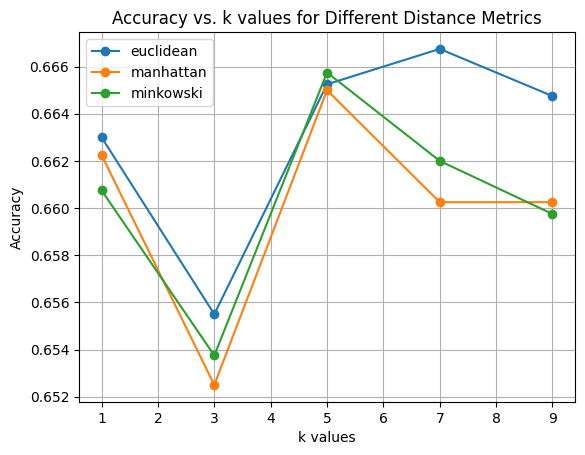

In [9]:
for metric in distance_metrics:
    accuracy_values = []
    for k in k_values:
        if metric == 'minkowski':
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=3)
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    plt.plot(k_values, accuracy_values, marker='o', label=metric)

plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k values for Different Distance Metrics')
plt.grid(True)
plt.legend()
plt.show()

#following this code I want to add bar plot for Average Accuracy for KNN using different distance metrics with x label as Distance metrics and y label as Average accuracy with different bar colors for each distance metrics

In [10]:
average_accuracies = {}

for metric in distance_metrics:
    accuracy_values = []
    for k in k_values:
        if metric == 'minkowski':
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=3)
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    average_accuracy = np.mean(accuracy_values)
    average_accuracies[metric] = average_accuracy

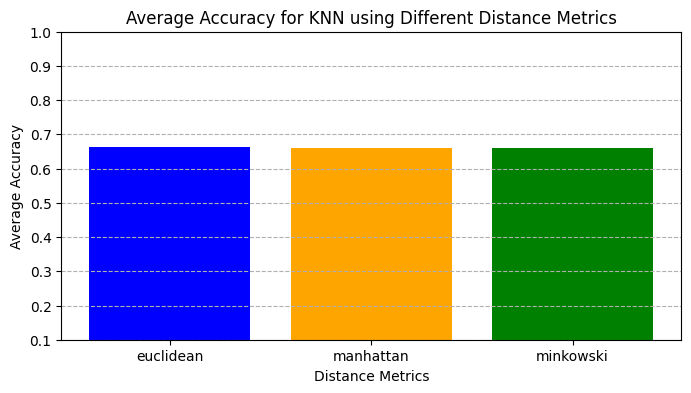

In [11]:
plt.figure(figsize=(8,4))
plt.bar(average_accuracies.keys(), average_accuracies.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Distance Metrics')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for KNN using Different Distance Metrics')
plt.ylim(0.1,1)
plt.grid(axis='y', linestyle='--')
plt.show()

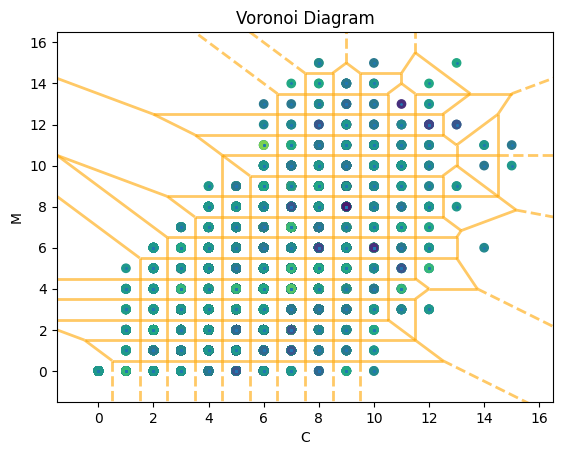

In [20]:
points = data[['C', 'M']].values 
vor = Voronoi(points) 
voronoi_plot_2d(vor, show_vertices=False, show_points=True,line_colors='orange', line_width=2, line_alpha=0.6, point_size=2) 

plt.scatter(data['C'], data['M'], c=data['P'], cmap='viridis') 
plt.title('Voronoi Diagram') 
plt.xlabel('C') 
plt.ylabel('M')  
plt.show()